**Chunking:** Chunking is defined as the process of natural language processing used to identify parts of speech and short phrases present in a given sentence.

For this, We first need to find out who is it talking about "Named Entity" or generally the subject.


Next, We need to find out the words that are modified or effects of noun.

In [6]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer #PunktSentenceTokenizer is an unsupervised machine learning sentence tokenizer
nltk.download('state_union')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [7]:
tokenized = custom_sent_tokenizer.tokenize(sample_text)
print(tokenized)

["PRESIDENT GEORGE W. BUSH'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS ON THE STATE OF THE UNION\n \nJanuary 31, 2006\n\nTHE PRESIDENT: Thank you all.", 'Mr. Speaker, Vice President Cheney, members of Congress, members of the Supreme Court and diplomatic corps, distinguished guests, and fellow citizens: Today our nation lost a beloved, graceful, courageous woman who called America to its founding ideals and carried on a noble dream.', 'Tonight we are comforted by the hope of a glad reunion with the husband who was taken so long ago, and we are grateful for the good life of Coretta Scott King.', '(Applause.)', 'President George W. Bush reacts to applause during his State of the Union Address at the Capitol, Tuesday, Jan.', '31, 2006.', "White House photo by Eric DraperEvery time I'm invited to this rostrum, I'm humbled by the privilege, and mindful of the history we've seen together.", 'We have gathered under this Capitol dome in moments of national mourning and national achievemen

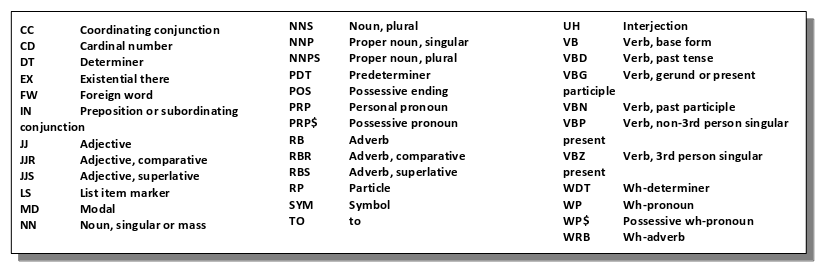

In [35]:
def process_content():
  try:
    for i in tokenized:
      words=nltk.word_tokenize(i)
      #print(words)
      tagged = nltk.pos_tag(words)
      #print(tagged)
      chunkGram = r'''Chunk: {<RB.?>*<VB.?>*<NNP><NN>?}''' #RB = Adverb & NNP = Proper noun & NN = Noun | . = Any character except new line | ? = 0-1 | * = 0 or more
      chunkParser = nltk.RegexpParser(chunkGram) #Parse via this chunkgram using regular expression
      chunked = chunkParser.parse(tagged) #Parsing the chunk [Kinda like JSON parser of Flutter]
      #print(chunked) #We are looking for "Chunk"
      for i in chunked:
        #print(i) #Uncomment it to see everything 
        i = str(i)
        #print(i[0:6])
        if i[1:6] == 'Chunk':    #We only want the tupless with "Chunk" before
          print(i[7:-1])
  except Exception as e :
    #pass
    print(str(e)) 

process_content()

PRESIDENT/NNP
GEORGE/NNP
W./NNP
BUSH/NNP
ADDRESS/NNP
A/NNP
JOINT/NNP
SESSION/NNP
THE/NNP
CONGRESS/NNP
ON/NNP
THE/NNP
STATE/NNP
THE/NNP
UNION/NNP
January/NNP
THE/NNP
PRESIDENT/NNP
Thank/NNP
Mr./NNP
Speaker/NNP
Vice/NNP
President/NNP
Cheney/NNP
Congress/NNP
Supreme/NNP
Court/NNP
called/VBD America/NNP
Coretta/NNP
Scott/NNP
King/NNP
Applause/NNP
President/NNP
George/NNP
W./NNP
Bush/NNP
State/NNP
Union/NNP
Address/NNP
Capitol/NNP
Tuesday/NNP
Jan/NNP
White/NNP
House/NNP photo/NN
Eric/NNP
DraperEvery/NNP time/NN
Capitol/NNP dome/NN
have/VBP served/VBN America/NNP
Tonight/NNP
Union/NNP
Applause/NNP
United/NNP
America/NNP
Applause/NNP
America/NNP
September/NNP
Dictatorships/NNP shelter/NN
Applause/NNP
Afghanistan/NNP
Iraqis/NNP
Lebanon/NNP
Egypt/NNP
Syria/NNP
Burma/NNP
Zimbabwe/NNP
North/NNP
Korea/NNP
Iran/NNP
Applause/NNP
President/NNP
George/NNP
W./NNP
Bush/NNP
Union/NNP
Address/NNP
Capitol/NNP
Tuesday/NNP
Jan/NNP
White/NNP
House/NNP photo/NN
Eric/NNP
Draper/NNP
No/NNP one/NN
Islam/NNP
Laden